In [19]:
pip install matplotlib

     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.9 kB ? eta -:--:--
     --------- --------------------------- 41.0/165.9 kB 487.6 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/165.9 kB 762.6 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/165.9 kB 652.2 kB/s eta 0:00:01
     -------------------------- --------- 122.9/165.9 kB 599.1 kB/s eta 0:00:01
     -----------------------------------  163.8/165.9 kB 701.4 kB/s eta 0:00:01
     ------------------------------------ 165.9/165.9 kB 622.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB 653.6 kB/s eta 0:00:12
   ---------------------------------------- 0.1/7.8 MB 657.6 kB/s eta 0:00:12
    --------------------------------------- 0.1/7.8 MB 656.4 kB/s eta 0:00:12
 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\mamth\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [7]:
df.pivot_table(values='salary_year_avg',index='job_country', columns='job_title_short', aggfunc='size')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Afghanistan,4.0,NaN,9.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN
Albania,11.0,1.0,36.0,30.0,12.0,4.0,2.0,6.0,11.0,6.0
Algeria,21.0,5.0,22.0,21.0,27.0,2.0,NaN,1.0,NaN,12.0
Angola,1.0,NaN,2.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0
Argentina,453.0,322.0,1273.0,2265.0,1617.0,287.0,255.0,647.0,350.0,1267.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela,2.0,2.0,16.0,19.0,9.0,4.0,4.0,4.0,3.0,6.0
Vietnam,91.0,70.0,334.0,768.0,375.0,115.0,71.0,220.0,91.0,279.0
Yemen,3.0,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0


In [4]:
df.groupby('job_title_short').size()

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

<Axes: xlabel='job_country'>

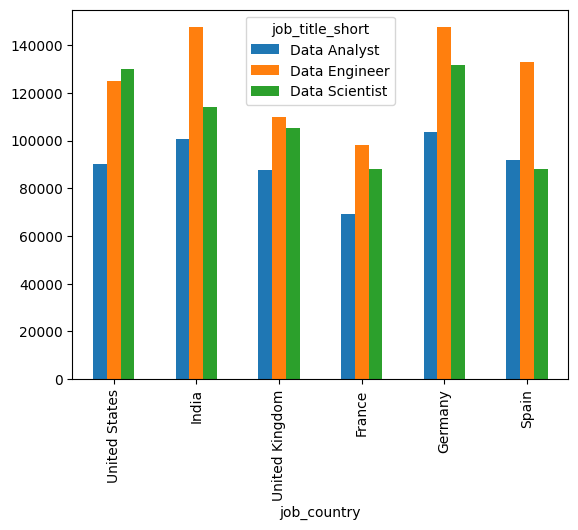

In [21]:
top_countries=df['job_country'].value_counts().head(6).index
df_job_country_salary = df.pivot_table(
    values='salary_year_avg',
    index='job_country',
    columns='job_title_short',
    aggfunc='median'
)
df_job_country_salary = df_job_country_salary.loc[top_countries]

job_titltes = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_job_country_salary = df_job_country_salary[job_titltes]

df_job_country_salary.plot(kind='bar')

In [22]:
df.pivot_table(index='job_title_short', aggfunc='size')

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [23]:
df.groupby('job_title_short').size()

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64